In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('dataset_mood_smartphone-2.csv')

#split date and time
df['date'] = pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time

grouped_df = df.groupby(['id', 'date', 'time', 'variable']).sum().reset_index()

#create dataframe of values per id per date per time
df = grouped_df.pivot_table(index=['id', 'date', 'time'], columns='variable', values='value')
df

variable                            activity  appCat.builtin  \
id      date       time                                        
AS14.01 2014-02-17 12:04:42.394000       NaN             NaN   
                   18:28:25.520000       NaN             NaN   
        2014-02-18 09:29:51.257000       NaN             NaN   
        2014-02-19 14:43:30.575000       NaN             NaN   
                   17:29:10.378000       NaN             NaN   
...                                      ...             ...   
AS14.33 2014-05-30 22:32:05.016000       NaN             NaN   
                   22:32:11.049000       NaN           3.122   
                   22:32:14.240000       NaN           1.003   
                   22:32:15.246000       NaN           4.134   
        2014-05-31 12:00:00              NaN             NaN   

variable                            appCat.communication  \
id      date       time                                    
AS14.01 2014-02-17 12:04:42.394000                   NaN   
                   18:28:25.520000                   NaN   
        2014-02-18 09:29:51.257000                   NaN   
        2014-02-19 14:43:30.575000                   NaN   
                   17:29:10.378000                   NaN   
...                                                  ...   
AS14.33 2014-05-30 22:32:05.016000                   NaN   
                   22:32:11.049000                   NaN   
                   22:32:14.240000                   NaN   
                   22:32:15.246000                   NaN   
        2014-05-31 12:00:00                          NaN   

variable                            appCat.entertainment  appCat.finance  \
id      date       time                                                    
AS14.01 2014-02-17 12:04:42.394000                   NaN             NaN   
                   18:28:25.520000                   NaN             NaN   
        2014-02-18 09:29:51.257000                   NaN             NaN   
        2014-02-19 14:43:30.575000                   NaN             NaN   
                   17:29:10.378000                   NaN             NaN   
...                                                  ...             ...   
AS14.33 2014-05-30 22:32:05.016000                   NaN             NaN   
                   22:32:11.049000                   NaN             NaN   
                   22:32:14.240000                   NaN             NaN   
                   22:32:15.246000                   NaN             NaN   
        2014-05-31 12:00:00                          NaN             NaN   

variable                            appCat.game  appCat.office  appCat.other  \
id      date       time                                                        
AS14.01 2014-02-17 12:04:42.394000          NaN            NaN           NaN   
                   18:28:25.520000          NaN            NaN           NaN   
        2014-02-18 09:29:51.257000          NaN            NaN           NaN   
        2014-02-19 14:43:30.575000          NaN            NaN           NaN   
                   17:29:10.378000          NaN            NaN           NaN   
...                                         ...            ...           ...   
AS14.33 2014-05-30 22:32:05.016000          NaN            NaN           NaN   
                   22:32:11.049000          NaN            NaN           NaN   
                   22:32:14.240000          NaN            NaN           NaN   
                   22:32:15.246000          NaN            NaN           NaN   
        2014-05-31 12:00:00                 NaN            NaN           NaN   

variable                            appCat.social  appCat.travel  \
id      date       time                                            
AS14.01 2014-02-17 12:04:42.394000            NaN            NaN   
                   18:28:25.520000            NaN            NaN   
        2014-02-18 09:29:51.257000            NaN            NaN   
        2014-02-

In [46]:
#create dataframe with properties of data
df_properties = pd.DataFrame(columns=['Attribute', 'Type', 'Unique Values', 'Missing Values', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'])
df_properties['Attribute'] = df.columns.values
df_properties['Type'] = df.dtypes.values
df_properties['Unique Values'] = df.nunique().values
df_properties['Missing Values'] = df.isnull().sum().values
df_properties['Mean'] = df.mean().values
df_properties['Std'] = df.std().values
df_properties['Min'] = df.min().values
df_properties['25%'] = df.quantile(0.25).values
df_properties['50%'] = df.quantile(0.5).values
df_properties['75%'] = df.quantile(0.75).values
df_properties['Max'] = df.max().values
df_properties

,Attribute,Type,Unique Values,Missing Values,Mean,Std,Min,25%,50%,75%,Max
0,activity,float64,1868,335961,0.115958,0.186946,0.000,0.00000,0.021739,0.158333,1.000
1,appCat.builtin,float64,23237,267638,18.538262,415.989243,-82798.871,2.02000,4.038000,9.922000,33960.246
2,appCat.communication,float64,39890,284650,43.343792,128.912750,0.006,5.21800,16.225500,45.475750,9830.777
3,appCat.entertainment,float64,12575,331801,37.576480,262.960476,-0.011,1.33400,3.391000,14.922000,32148.677
4,appCat.finance,float64,729,357987,21.755251,39.218361,0.131,4.07200,8.026000,20.155000,355.513
5,appCat.game,float64,792,358113,128.391615,327.145246,1.003,14.14800,43.168000,123.625000,5491.793
6,appCat.office,float64,3178,353284,22.578892,449.601382,0.003,2.00400,3.106000,8.043750,32708.818
7,appCat.other,float64,5014,351276,25.810839,112.781355,0.014,7.01900,10.028000,16.829250,3892.038
8,appCat.social,float64,14660,339781,72.401906,261.551846,0.094,9.03000,28.466000,75.372000,30000.906
9,appCat.travel,float64,2606,356080,45.730850,246.109307,0.080,5.08650,18.144000,47.227250,10452.615


Notably large differences between max values and 75%-quantile values for almost every attribute. Additionally, mean value for almost every attribute is larger than median \(50%-quantile) value. These two observations indicate extreme outliers.

Range of values for mood is (1.00,16.00), even though the maximum value for mood should be 10.
The minimum value for both circumplex.arousal and circumplex.valence is -3.00, although the scale is (-2,2).

In [24]:
df.mood.value_counts()

7.0     2579
8.0     1426
6.0     1001
5.0      255
9.0      215
4.0       90
10.0      18
3.0       17
2.0       13
13.0       5
1.0        3
15.0       2
11.0       1
12.0       1
16.0       1
14.0       1
Name: mood, dtype: int64

This represents the count of each value for mood in descending order. It has the most values concentrated in categories 7, 8 and 6. There are only a few values in category 1, 2 and 3.

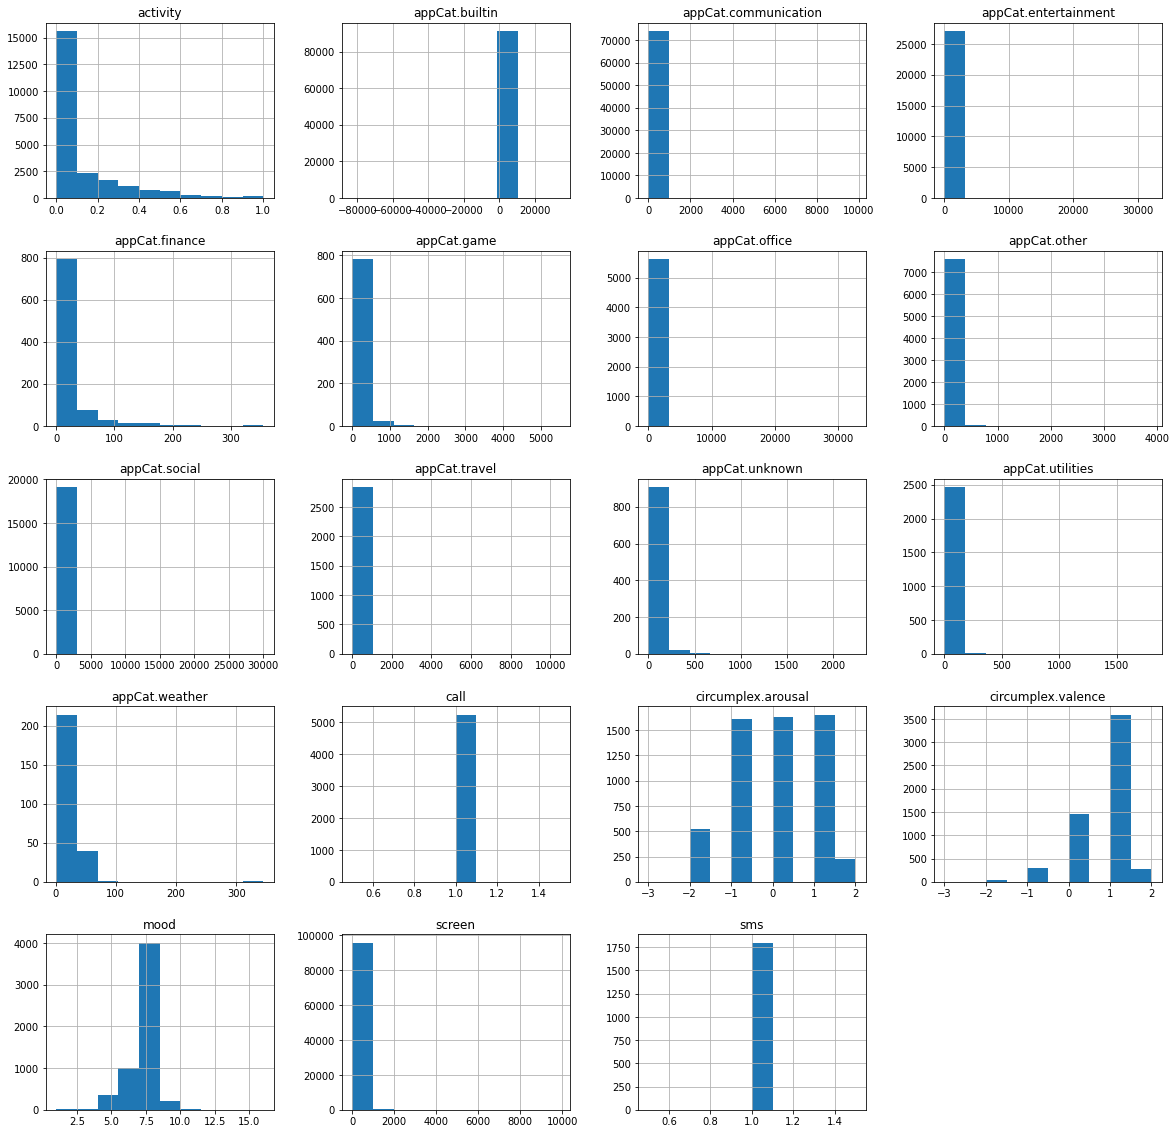

In [23]:
#distribution of values for each attribute
df.hist(figsize=(20,20))
plt.show()

Activity is right skewed. Rest of the attributes do not seem to have a clear distribution. Mood is somewhat normally distributed. 

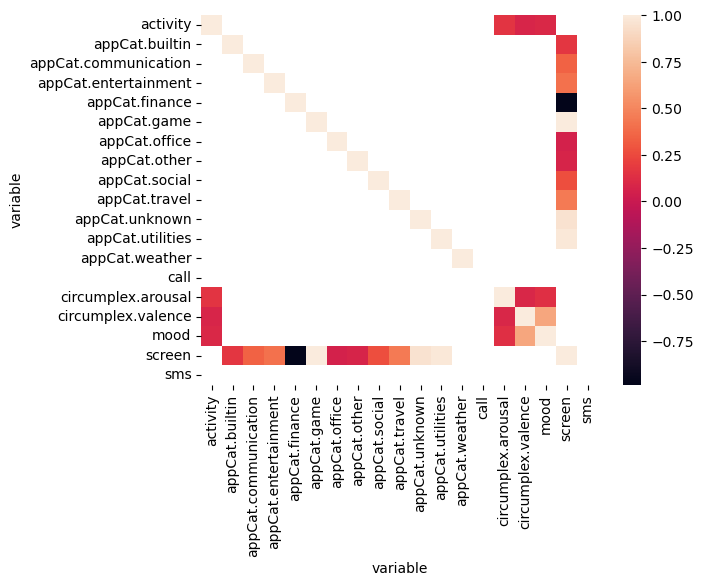

appCat.communication  -  screen :  0.34419649200977065
appCat.entertainment  -  screen :  0.4101930523580858
appCat.finance  -  screen :  -0.9838323787754305
appCat.game  -  screen :  0.9978362596993967
appCat.travel  -  screen :  0.44794841268765584
appCat.unknown  -  screen :  0.9468966716348953
appCat.utilities  -  screen :  0.983859617456929
circumplex.valence  -  mood :  0.6475158914474823
mood  -  circumplex.valence :  0.6475158914474823
screen  -  appCat.communication :  0.34419649200977065
screen  -  appCat.entertainment :  0.4101930523580858
screen  -  appCat.finance :  -0.9838323787754305
screen  -  appCat.game :  0.9978362596993967
screen  -  appCat.travel :  0.44794841268765584
screen  -  appCat.unknown :  0.9468966716348953
screen  -  appCat.utilities :  0.983859617456929


In [4]:
#correlation matrix for all attributes
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

#print correlations between attributes with a value of more than 0.8
for col in corr.columns:
    for row in corr.index:
        if abs(corr[col][row]) > 0.3 and corr[col][row] < 1:
            print(col, ' - ', row, ': ', corr[col][row])

It seems like duration of screen activity has a positive correlation with the duration of usage of game apps, utilities apps and unknown apps. For the rest there are no strong correlations.

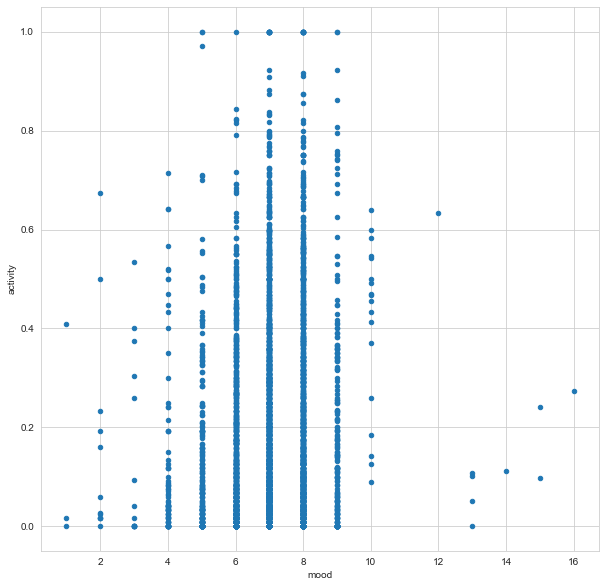

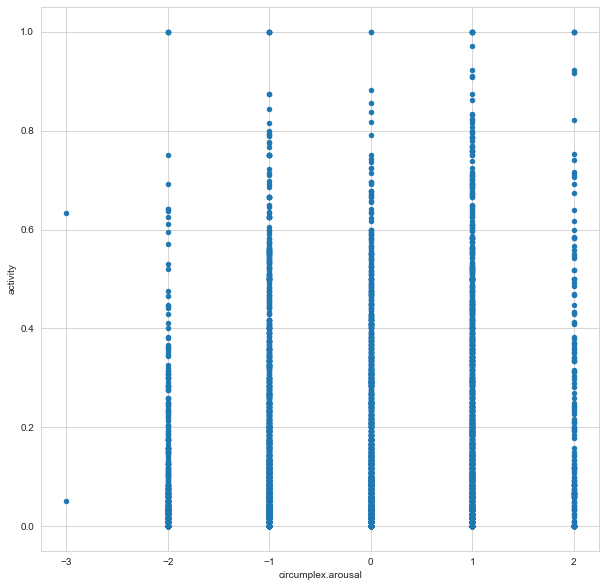

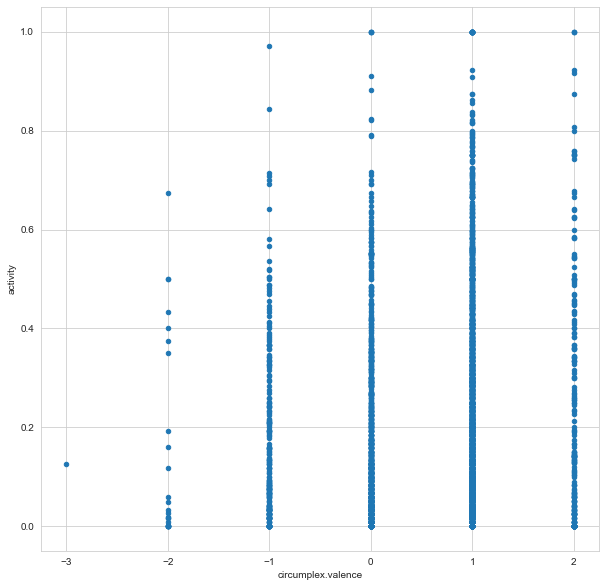

In [54]:
#create plot for mood and activity
df.plot.scatter(x='mood', y='activity', figsize=(10,10))
plt.show()

#create plot for arousal and activity
df.plot.scatter(x='circumplex.arousal', y='activity', figsize=(10,10))
plt.show()

#create plot for valence and activity
df.plot.scatter(x='circumplex.valence', y='activity', figsize=(10,10))
plt.show()